# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Agregamos la base de datos con pandas a python con pd.read.
df = pd.read_csv("C:\\Users\\Lenovo\\Documents\\Programación Ciencia de datos\\Guia 3\\accidents-1.csv", delimiter=";") 
#print(df.head(4))

# Se cambia el formato tanto de la fecha como de la hora. 
df["DATE"] = pd.to_datetime(df["DATE"], format="%m/%d/%Y")
df["TIME"] = pd.to_datetime(df["TIME"], format= "%H:%M").dt.time

# Se imprime la información de la base de datos.
#print(f"La base de datos tienes las siguientes filas y columnas \n\n {df.shape}")
#print(f"la base de datos tiene la siguiente información \n\n {df.info()}")

# Se cambia el type de Date para que sea datetime 64 

# Se usa .isnull() para saber cuántos valores son nulos.
#print(df.isnull().sum())
#print(df.head(2))
df1 = df.copy()

# Para imputar los datos creamos una función para rellenar con la moda en el caso del Zip Code.
def rellenar_Zip (grupo):
    moda = df1["ZIP CODE"].mode()[0]
    grupo["ZIP CODE"].fillna(moda, inplace=True)
    return grupo

df1 = df1.groupby("BOROUGH").apply(rellenar_Zip)
print(df1.isnull().sum())

# otra opcion.
df1 = df1.reset_index(drop=True)
df1["LATITUDE"]= df1.groupby("BOROUGH")["LATITUDE"].transform(lambda x: x.fillna(x.mean()))
#print(df1.isnull().sum())

# Función  para rellenar los nulls en LATITUD, LONGITUD, ON STREET NAME.
def fill_ll (grupo):
    mediala = grupo["LATITUDE"].mean()
    medialo = grupo["LONGITUDE"].mean()
    grupo["LATITUDE"].fillna(mediala, inplace=True)
    grupo["LONGITUDE"].fillna(medialo, inplace=True)
    grupo["ON STREET NAME"].fillna("UNKNOWN", inplace=True)
    return grupo
df1 = df1.reset_index(drop=True)
df1 = df1.groupby("BOROUGH", group_keys=False).apply(fill_ll)

# Código para rellenar CONTRIBUTING FACTOR VEHICLE X
Fillnuls = df1[["CONTRIBUTING FACTOR VEHICLE 1","CONTRIBUTING FACTOR VEHICLE 2","CONTRIBUTING FACTOR VEHICLE 3","CONTRIBUTING FACTOR VEHICLE 4","CONTRIBUTING FACTOR VEHICLE 5"]]
Fillnuls.fillna("Unspecified", inplace=True)
df1[["CONTRIBUTING FACTOR VEHICLE 1","CONTRIBUTING FACTOR VEHICLE 2","CONTRIBUTING FACTOR VEHICLE 3","CONTRIBUTING FACTOR VEHICLE 4","CONTRIBUTING FACTOR VEHICLE 5"]]=Fillnuls
#print(df1.isnull().sum())

# Código para rellenar VEHICLE TYPE CODE
fillnuls1 = df1[["VEHICLE TYPE CODE 1","VEHICLE TYPE CODE 2","VEHICLE TYPE CODE 3","VEHICLE TYPE CODE 4","VEHICLE TYPE CODE 5"]]
fillnuls1.fillna("Unknown", inplace=True)
df1[["VEHICLE TYPE CODE 1","VEHICLE TYPE CODE 2","VEHICLE TYPE CODE 3","VEHICLE TYPE CODE 4","VEHICLE TYPE CODE 5"]]=fillnuls1
print(df1.isnull().sum())
print(df1)

frecuenta = df[df["VEHICLE TYPE CODE 1"].isin(["Bike","BICYCLE"])]["VEHICLE TYPE CODE 1"].value_counts()
#print(frecuenta)

mirar = df1["VEHICLE TYPE CODE 1"].value_counts()
top5 = mirar.head(30)
#print(top5)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11448\2093535928.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grupo["ZIP CODE"].fillna(moda, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11448\2093535928.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns aft

DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                              0
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTING FACTOR VEHICLE 4    235666
CONTRIBUTING FACTOR VEHICLE 5    237730
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1721
VEHICLE TYPE CODE 2               55590
VEHICLE TYPE CODE 3              226221
VEHICLE TYPE CODE 4              235806
VEHICLE TYPE CODE 5              237769
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11448\2093535928.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grupo["LATITUDE"].fillna(mediala, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11448\2093535928.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

DATE                             0
TIME                             0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
ON STREET NAME                   0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
dtype: int64
             DATE      TIME        BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0      2018-09-26  12:12:00          BRONX   10454.0  40.808987 -73.9

### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [x] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [x] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [x] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [x] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [x] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [x] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


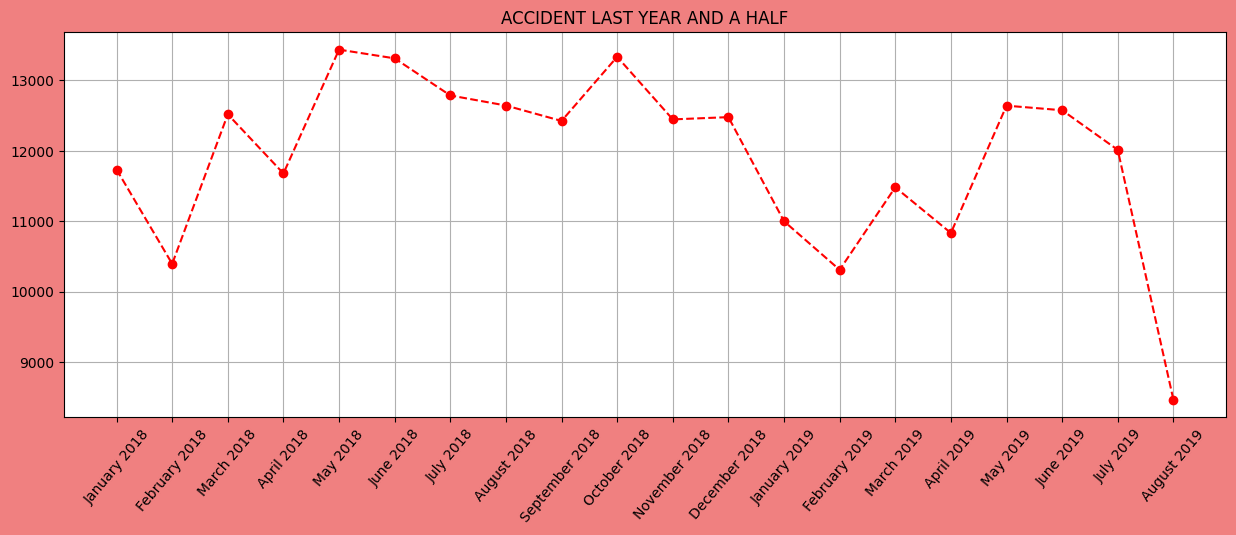

In [11]:
# Se importa la biblioteca matplotlib con la extensión pypltot.
import matplotlib.pyplot as plt
# Se crea una columna con los meses en la base de datos, y se convierte Date en formato de period .to_period()
df1["MONTH"] = df1["DATE"].dt.to_period("M")
# se crea una variable que agrupa por el mes, y cuenta los accidentes por ese mes.
mes  = df1.groupby("MONTH")["CONTRIBUTING FACTOR VEHICLE 1"].count()
promedio = mes.mode()
# Se le indica al programa que muestre el mes en letras y el año.
letras = mes.index.strftime("%B %Y")

# Se crean los ejes para ser ploteados, x y y como variables.
x= letras
y=mes.values
# Se utilizan las funciones de Metplotlib para gráficar las funciones. Se agrega el tamaño del grafico, color,grid,titulos y demás.
plt.figure(figsize=(15,5), facecolor="lightcoral")
plt.grid()
plt.title("ACCIDENT LAST YEAR AND A HALF")
plt.xticks(rotation=50)
plt.plot(x,y, color="r", marker="o", linestyle="--", label="Accidents")
plt.show()



El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

# Los meses con menos incidencias según la gráfica son Enero, Febrero y abril con incidencias dentro de los 10 mil y 12 mil accidentes. Esto se puede deber a que en estas fechas las personas se encuentras menos en Nueva York por tema de viajes y vacaciones, lo que puede generar menos accidentes. En cambio, al estar más personas en la ciudad trabajando, estudiando, o viviendo aumentar las posibilidades de accidentes.

### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

En el gráfico se muestra claramente que los picos de accidentes en Nueva York abarcan desde las 8 am hasta las 6pm (14 mil -17 mil acc).
 Esto claramente coincide en las horas de mayor actividad en la ciudad. 
 Sin embargo después de las 7 de la noche el número de accidentes baja a menos de 10 mil, 
 llegando a menos de 4000 mil desde la 1 am hasta las 5 am.


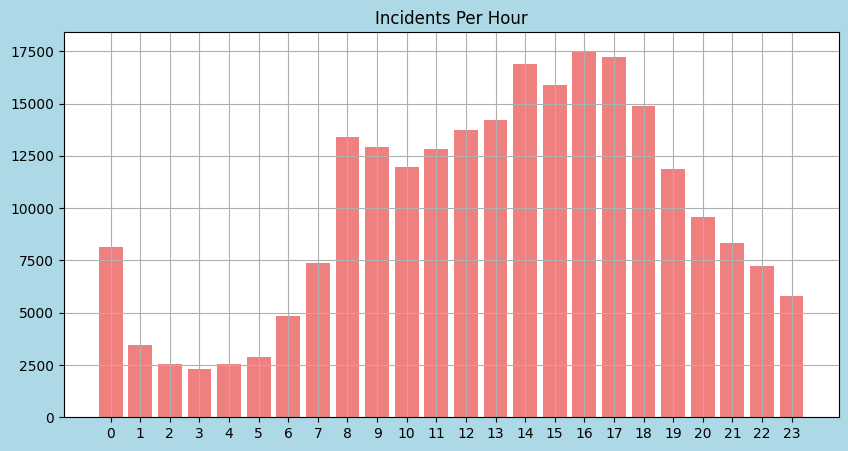

In [8]:
# A la columna time se le da un formato de hora, y después se crea un acolumna llamada hour que contiene solo la hora en HH:MM.
df1["TIME"]= pd.to_datetime(df1["TIME"], format="%H:%M:%S")

df1["HOUR"]= df1["TIME"].dt.hour
# Despues se crea una variable que agrupa las horas y hace un conteo en las causas de los accidentes.
conteo = df1.groupby("HOUR")["CONTRIBUTING FACTOR VEHICLE 5"].count()
# Se crean los ejes para ser graficados.
x= conteo.index
Y= conteo.values
# Se imprime la respuesta a la pregunta.
print("En el gráfico se muestra claramente que los picos de accidentes en Nueva York abarcan desde las 8 am hasta las 6pm (14 mil -17 mil acc).\n Esto claramente coincide en las horas de mayor actividad en la ciudad. \n Sin embargo después de las 7 de la noche el número de accidentes baja a menos de 10 mil, \n llegando a menos de 4000 mil desde la 1 am hasta las 5 am.")
# Se utilizan las funciones de Metplotlib para graficar el código de arriba.
plt.figure(figsize=(10,5), facecolor="lightblue")
plt.grid()
plt.xticks(ticks=x)
plt.title("Incidents Per Hour")
plt.bar(x,Y, color="lightcoral")
plt.show()


En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

# Cuando no se agregan las fechas y solo se agregan las horas, se pueden tener sesgos en la lectura de la data, dado que hay épocas del año donde los accidentes son menores sin importar la hora, pueden a ver coincidencias, pero sin el Date solo estamos viendo a grandes razgos la información horaria. 

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

En este gráfico se aprecia que durante los business days los accidentes están en el rango de 35 mil accidentes para arriba. 
 Mientras que el fin de semana los accidentes estan entre los 32 mil y 27 mil. 
 Sin embargo, los accidentes se mantienen constantes a excepción del domingo.


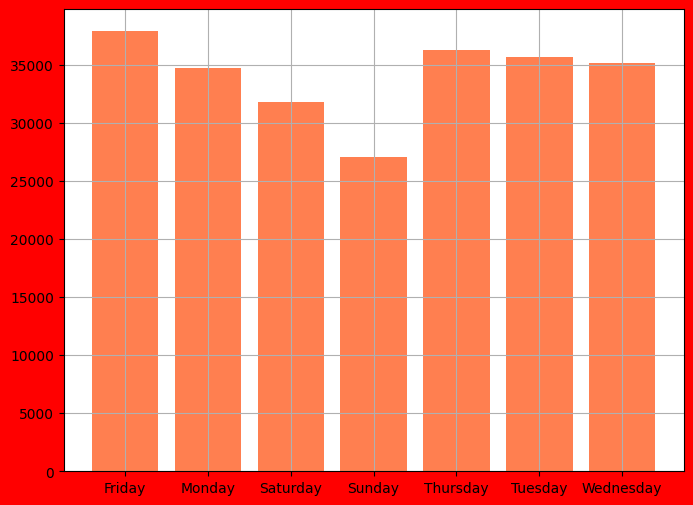

In [ ]:
# Se crea una columna llamada week, la cual convierte DATE en forma del nombre del día.
df1["WEEK"] = df1["DATE"].dt.day_name()
# Después se crea una variable que agrupa los días , y los agrupa con las causas de los accidentes en forma de conteo.
conteow = df1.groupby("WEEK")["CONTRIBUTING FACTOR VEHICLE 2"].count()
# Se crea los ejes para ser graficados.
x=conteow.index
y=conteow.values
# Se imprime la respuesta a la pregunta propuesta.
print("En este gráfico se aprecia que durante los business days los accidentes están en el rango de 35 mil accidentes para arriba. \n Mientras que el fin de semana los accidentes estan entre los 32 mil y 27 mil. \n Sin embargo, los accidentes se mantienen constantes a excepción del domingo.")
# Utilizando Metplotlib se grafican los resultados.
plt.figure(figsize=(8,6), facecolor="red")
plt.grid()
plt.bar(x,y, color="coral")
plt.show()

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

Accidentes por borough:

 BOROUGH
BROOKLYN         76253
QUEENS           67120
MANHATTAN        48749
BRONX            37709
STATEN ISLAND     8691
Name: count, dtype: int64
1098 617 2147 893 151


 Número de accidentes por kilometro:

          Borough  Accident
2      MANHATTAN      2147
0       BROOKLYN      1098
3          BRONX       893
1         QUEENS       617
4  STATEN ISLAND       151

Podemos concluir que Queens y Brooklyn son los boroughs con más accidentes sumados.
Sin embargo, mirandolo por milla cuadra Manhattan y Brooklyn tienen los mayores indices.
Manhattan tiene más de 2000 accidentes por milla cuadrada. 


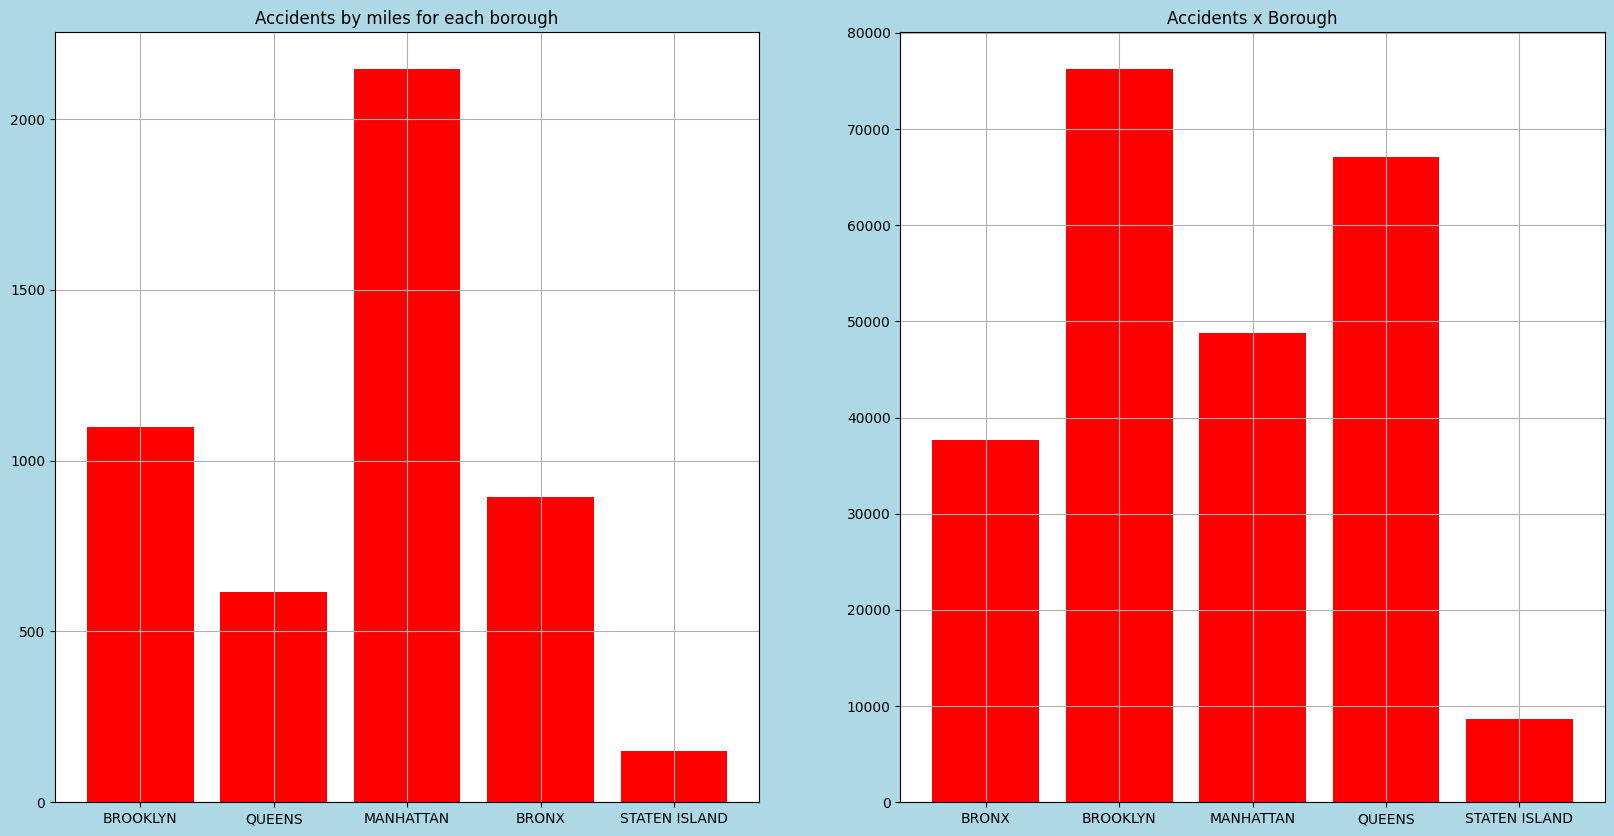

In [49]:
# Numeros de accidentes por borough.
vamos = df1["BOROUGH"].value_counts()
print(f"Accidentes por borough:\n\n {vamos}")

# Primero, se agrupan los Boroughs por las causas de los accidentes para cada uno, en forma de conteo.
NY = df1.groupby("BOROUGH")["CONTRIBUTING FACTOR VEHICLE 4"].count()
# Se crea un diccionario con los kilometros cuadrados de los boroughs.
NY1 = {"BRONX":42.2,"QUEENS":108.7,"MANHATTAN":22.7,"BROOKLYN":69.4,"STATEN ISLAND":57.5}
# Operación que divide los accidentes de brooklyn con sus millas cuadradas.  BROOKLYN
BRO = df1[df1["BOROUGH"]=="BROOKLYN"]
ACC = BRO["CONTRIBUTING FACTOR VEHICLE 4"].count()
KM = int(ACC/NY1["BROOKLYN"])

# Operación que divide los accidentes de brooklyn con sus millas cuadradas. QUEENS
QUE = df1[df1["BOROUGH"]=="QUEENS"]
ACC1 = QUE["CONTRIBUTING FACTOR VEHICLE 4"].count()
KM1 = int(ACC1/NY1["QUEENS"])
# Operación que divide los accidentes de brooklyn con sus millas cuadradas. MANHATTAN
MAN = df1[df1["BOROUGH"]=="MANHATTAN"]
ACC2 = MAN["CONTRIBUTING FACTOR VEHICLE 4"].count()
KM2 = int(ACC2/NY1["MANHATTAN"])
# Operación que divide los accidentes de brooklyn con sus millas cuadradas. BRONX
BRONX = df1[df1["BOROUGH"]=="BRONX"]
ACC3 = BRONX["CONTRIBUTING FACTOR VEHICLE 4"].count()
KM3 = int(ACC3/NY1["BRONX"])
# Operación que divide los accidentes de brooklyn con sus millas cuadradas. BRONX
STATE = df1[df1["BOROUGH"]=="STATEN ISLAND"]
ACC4 = STATE["CONTRIBUTING FACTOR VEHICLE 4"].count()
KM4 = int(ACC4/NY1["STATEN ISLAND"])
print(KM,KM1,KM2,KM3,KM4)

data = pd.DataFrame({"Borough":["BROOKLYN","QUEENS","MANHATTAN","BRONX","STATEN ISLAND"],
                     "Accident":[KM,KM1,KM2,KM3,KM4]})

sorted1= data.sort_values(by="Accident", ascending=False)

print(f"\n\n Número de accidentes por kilometro:\n\n {sorted1}")

boroughs = ["BROOKLYN","QUEENS","MANHATTAN","BRONX","STATEN ISLAND"]
kms = [KM,KM1,KM2,KM3,KM4]

print("\nPodemos concluir que Queens y Brooklyn son los boroughs con más accidentes sumados.\n\
Sin embargo, mirandolo por milla cuadra Manhattan y Brooklyn tienen los mayores indices.\n\
Manhattan tiene más de 2000 accidentes por milla cuadrada. ")
# Se crea los ejes de las variables 
x= NY.index
y= NY.values
# Se grafica el código de arriba configurando tamaño, color, eje, labels, y demás.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10), facecolor="lightblue")
axs[0].bar(boroughs,kms,color="red", label= "total accidents")
axs[0].grid()
axs[0].set_title("Accidents by miles for each borough")

axs[1].bar(x,y,color="red", label= "total accidents")
axs[1].grid()
axs[1].set_title("Accidents x Borough")
plt.show()


Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

# Por milla cuadrada los boroughs con más accidentes son Manhattan y Brooklyn. Lo que quiere decir que Queens por milla cuadrada tiene un poco más de 500 accidentes; pero al mismo tiempo, es el borough con más millas kuadradas 108.

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

Las horas con más accidentes por cada Borough son 
BOROUGH
BRONX            16
BROOKLYN         16
MANHATTAN        14
QUEENS           17
STATEN ISLAND    16
dtype: int32


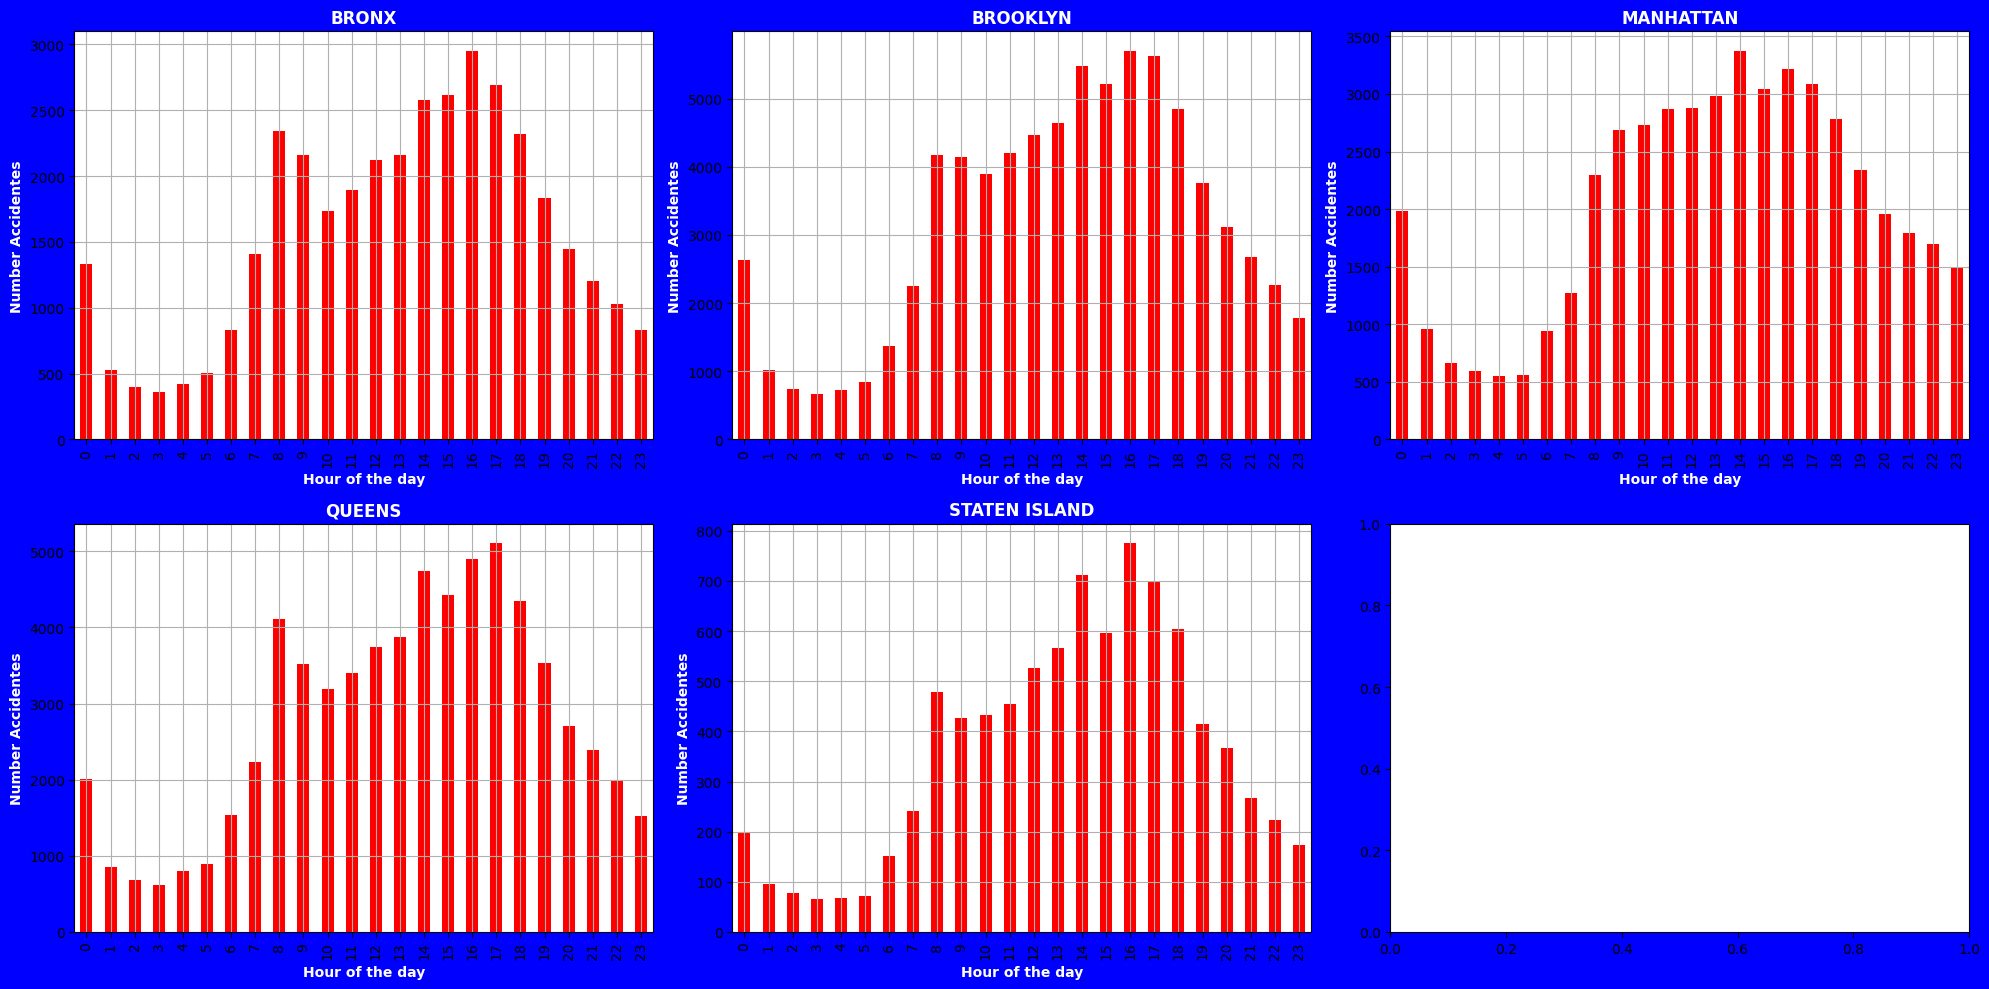

In [ ]:
# Primero, se agrupan el borough y la hora , para después contar los factores de los accidentes..unstack() para trasformar los indices en columnas.
boroughh = df1.groupby(["BOROUGH","HOUR"])["CONTRIBUTING FACTOR VEHICLE 4"].count().unstack()

# Se crean los diferentes gráficos con plt.subplots con las especificaciones del caso.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10), facecolor="blue")
# Se crea una lista plana con todos los datos con .flatten()
axes= axes.flatten()
# Se muestran las horas con más accidentes en letras con idxmax.
mirar = boroughh.idxmax(axis=1)
# Se imprime la salida del código anterior.
print(f"Las horas con más accidentes por cada Borough son \n{mirar}")

# Se crea una función que iteré enre la variable antes creadada boroughh y organice la información en los lotes Borough y data. 
for i, (borough, data) in enumerate (boroughh.iterrows()):
    if i < len(axes):
        ax = axes[i]
        data.plot(kind="bar", color="red", ax=ax)
        ax.set_title(borough, color="white", fontweight="bold")
        ax.set_xlabel('Hour of the day', color="white", fontweight="bold")
        ax.set_ylabel('Number Accidentes', color="white", fontweight="bold")
        ax.grid(True)
        
  # Se plotean los gráficos.
plt.tight_layout()
plt.show()

# Para todos las divisiones de Nueva York la mayor cantidad de accidentes están ocurriendo dentro las 4 y 5 pm. Sin embargo, para Manhattan la hora con más accidentes es las 2 de la tarde. y para Staten Island, las horas con mayor pico son la 4 y 2 de la tarde. Pero, en general se mantiene un rango de 4 a 5 pm. Como las horas con más accidentes.

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

# En general se ve que la mayor cantidad de accidentes tienen un rango de entre las 4 pm a 5 pm; la única excepción es Manhattan donde el máximo se alcanza a las 2pm. Podrían concentrarse los esfuerzos en todos los muncipios, utilizando un rango de las 2 pm y las 5 pm , para implementar estratégias de prevención.

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

 estos son los 8 accidentes más frecuentes en los boroughs de New York:
                            Reason  accidents
0                     Unspecified     979902
1  Driver Inattention/Distraction      72203
2   Failure to Yield Right-of-Way      20413
3           Following Too Closely      17909
4                Backing Unsafely      15068
5             Passing Too Closely      13378
6  Passing or Lane Usage Improper      12953
7                 Other Vehicular      11093


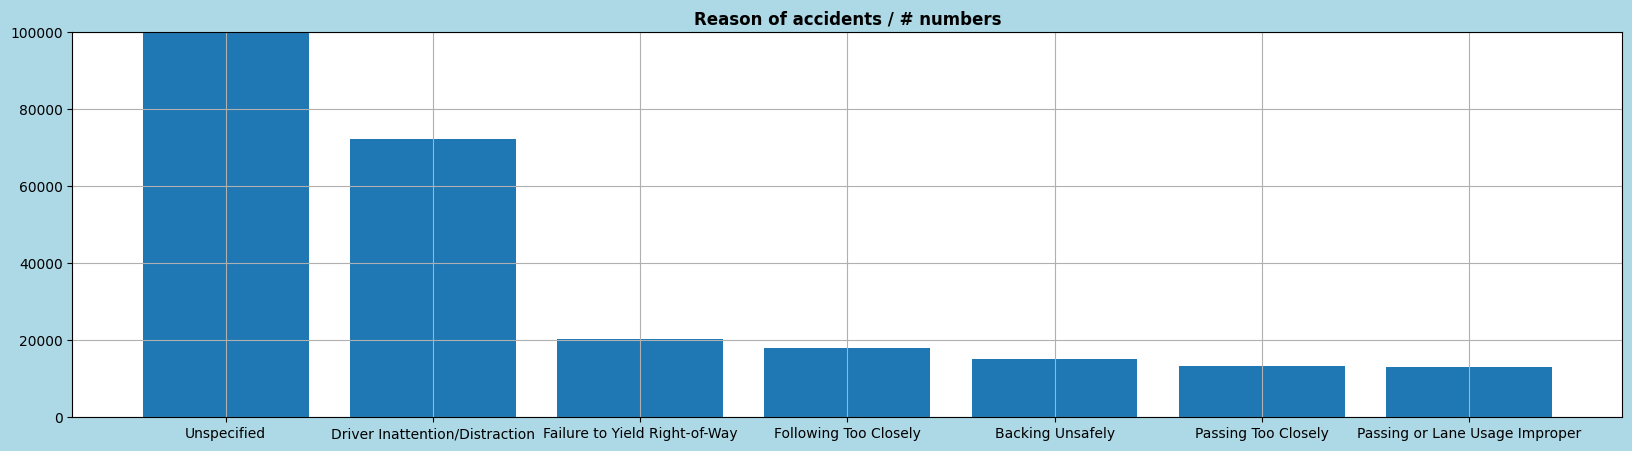

<Figure size 640x480 with 0 Axes>

In [ ]:

# Se concatenan todos los factores de los accidentes en una solo variable llamada (Factors).
factors = pd.concat([df1["CONTRIBUTING FACTOR VEHICLE 5"],
                    df1["CONTRIBUTING FACTOR VEHICLE 4"],
                    df1["CONTRIBUTING FACTOR VEHICLE 3"],
                    df1["CONTRIBUTING FACTOR VEHICLE 2"],
                    df1["CONTRIBUTING FACTOR VEHICLE 1"]])


# Después, reiniciamos los indices de Factors para organizar, asi como se borran los nas y por 
# último se crea una variable que toma factors y hace un conteo, y vuelve a reiniciar el indice.
factors = factors.reset_index(drop=True)
factors = factors.dropna()
number = factors.value_counts().reset_index()
# tercero, en la variable numbers se utiliza .columns para poner los títulos de los factores, y su conteo.
number.columns = ["Reason","accidents"]
numberfinal = number.head(7)
# Cuarto, imprimimos la respuesta en texto con las princupales causes.
print(f" estos son los 8 accidentes más frecuentes en los boroughs de New York:\n {number.head(8)}")
# Se crean los ejes X y Y para ser graficados.
x= numberfinal["Reason"]
y= numberfinal["accidents"]
# Finalmente, se utiliza Matplotlib para gráficar los códigos propuestos.
plt.figure(figsize=(20,5), facecolor="lightblue")
plt.grid()
plt.title("Reason of accidents / # numbers", fontweight= "bold")
plt.ylim(0,100000)
plt.bar(x,y)
plt.show()
plt.tight_layout()


### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

# En todos los estados los vehículos más relacionados con accidentes son los sedan de primero y los Station Wagon de segundo.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_83756\1428345663.py:26: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


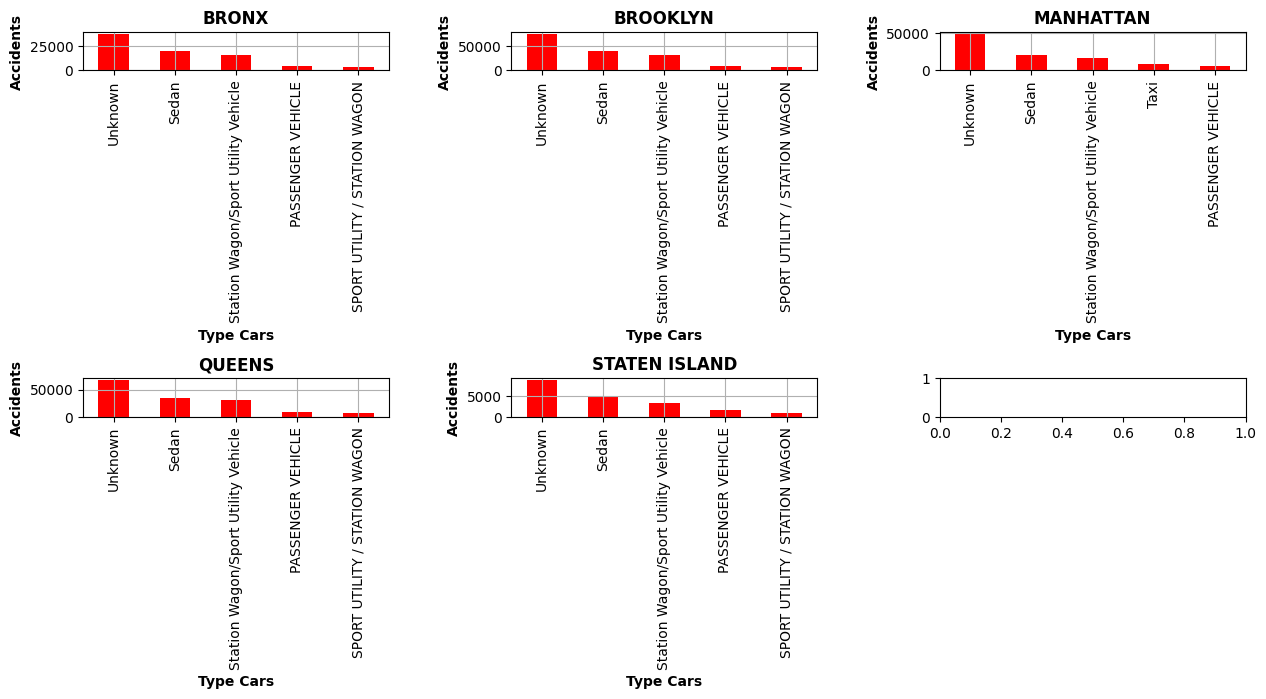

In [ ]:
# Primero, se concatenan todos los tipos de vehículos, quitando nas, y creando una lista, en la variable "cars".
df1["cars"] = pd.concat([df1["VEHICLE TYPE CODE 1"],
                  df1["VEHICLE TYPE CODE 2"],
                  df1["VEHICLE TYPE CODE 3"],
                  df1["VEHICLE TYPE CODE 4"],
                  df1["VEHICLE TYPE CODE 5"]],axis=1).apply(lambda x: x.dropna().unique().tolist(), axis=1)

# Segundo, se utiliza .explode para poder expandir esa lista en multiples filas. 
new_ex = df1.explode('cars')
# Tercero, agrupamos los boroughs y los cars, contando los elementos, y despivotandolos para crear esos indices en columnas.
new = new_ex.groupby(['BOROUGH', 'cars']).size().unstack()
# Cuarto, se crean la configuración para los gráficos.
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(15,5))
# Quinto, se aplana la lista en una sola fila.
axes=axes.flatten()
# Sexto, se crea una función que iteres entre las filas de la variable new, y organice los datos en los lotes Borought y data.
for i, (borough, data) in enumerate (new.iterrows()):
    if i < len(axes):
        ax = axes[i]
        top5_data = data.nlargest(5)
        top5_data.plot(kind="bar", color="red", ax=ax)
        ax.set_title(str(borough) if pd.notna(borough) else "Unknown", color="black", fontweight="bold", fontsize=12)  # Modificado aquí
        ax.set_xlabel('Type Cars', color="black", fontweight="bold")
        ax.set_ylabel('Accidents', color="black", fontweight="bold")
        ax.grid(True)

# Septima, se plotean los resultados.
plt.subplots_adjust(wspace=0.4, hspace=8)
plt.tight_layout()
plt.show()


### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [x] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

 Comparando el primer semestre del 2019 con el de 2018, se descubre que la distracción del conductor,
 la inatención de los peatones, y la obstrucción visual son las razones principales porque el 2019 tuvo más accidentes en estos ambitos.
Sabiendo estos factores que aumentaron se debe trabajar en conjunto para concientizar tanto a peatones como a counductores
 de los peligros que se generan al no prestar atención cuando se está al volante y cuando se cruza la calle


                                            Accident  Number
0                                        Unspecified   10528
1                     Driver Inattention/Distraction     720
2                      Failure to Yield Right-of-Way     603
3  Pedestrian/Bicyclist/Other Pedestrian Error/Co...     139
4                                   Backing Unsafely      82
5                            View Obstructed/Limited      55


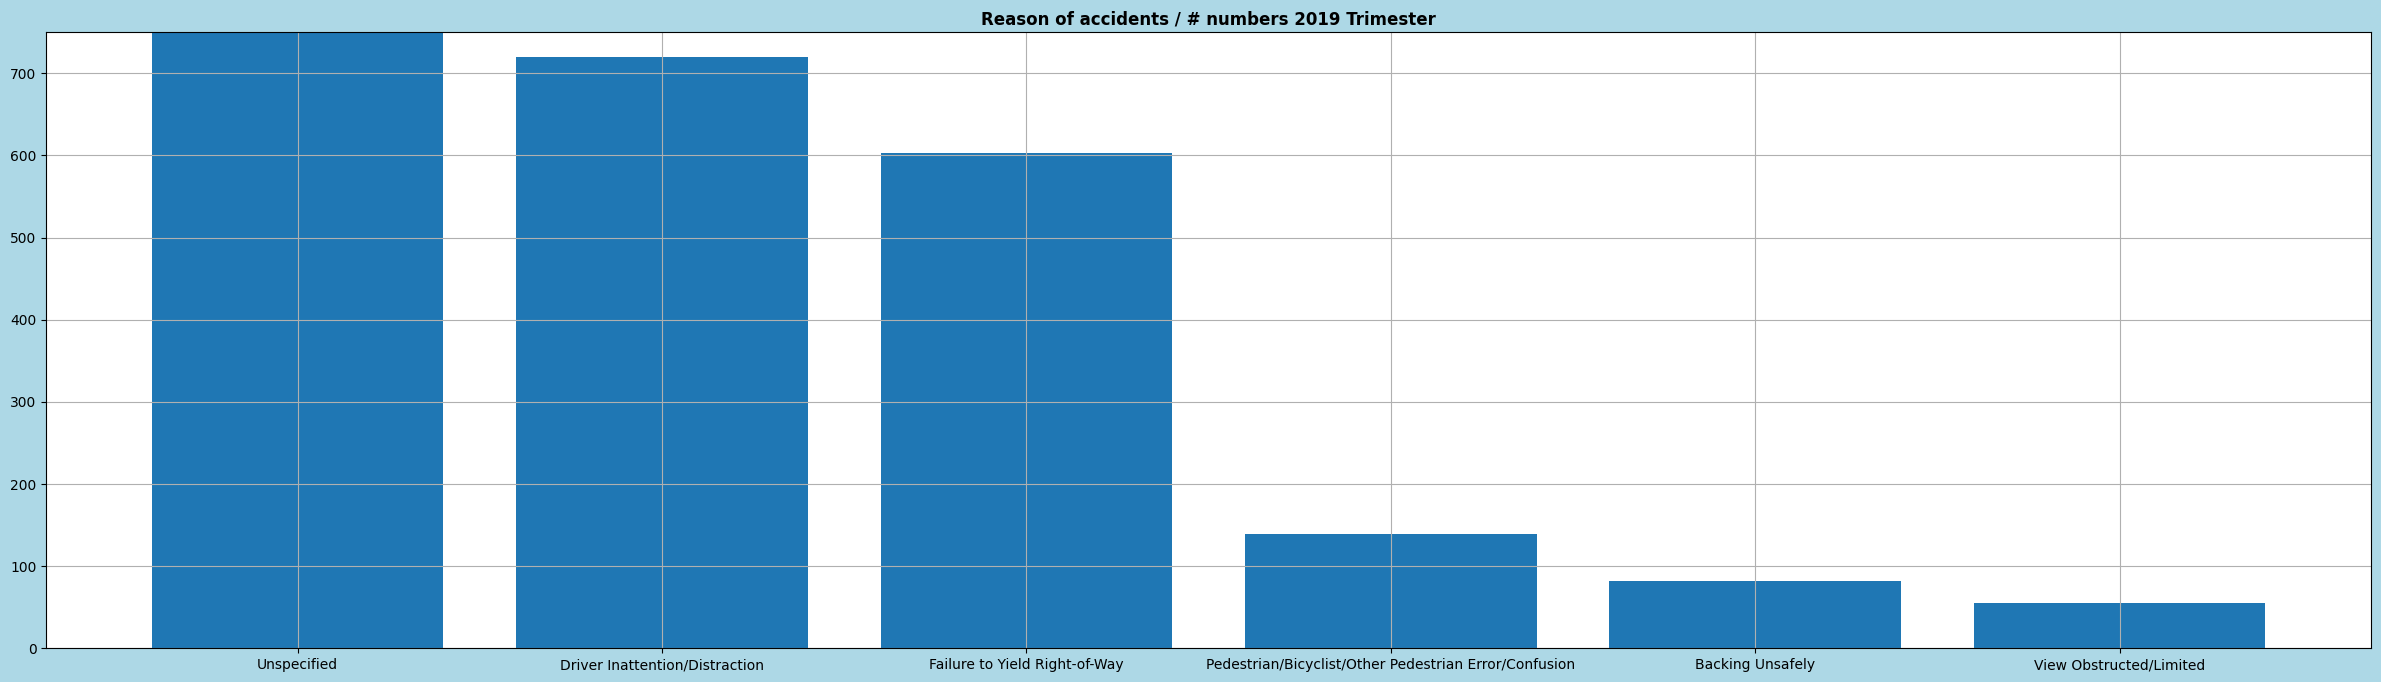

                                            accident  number
0                                        Unspecified   10975
1                     Driver Inattention/Distraction     713
2                      Failure to Yield Right-of-Way     661
3  Pedestrian/Bicyclist/Other Pedestrian Error/Co...     137
4                                   Backing Unsafely     106
5                        Traffic Control Disregarded      52


<Figure size 640x480 with 0 Axes>

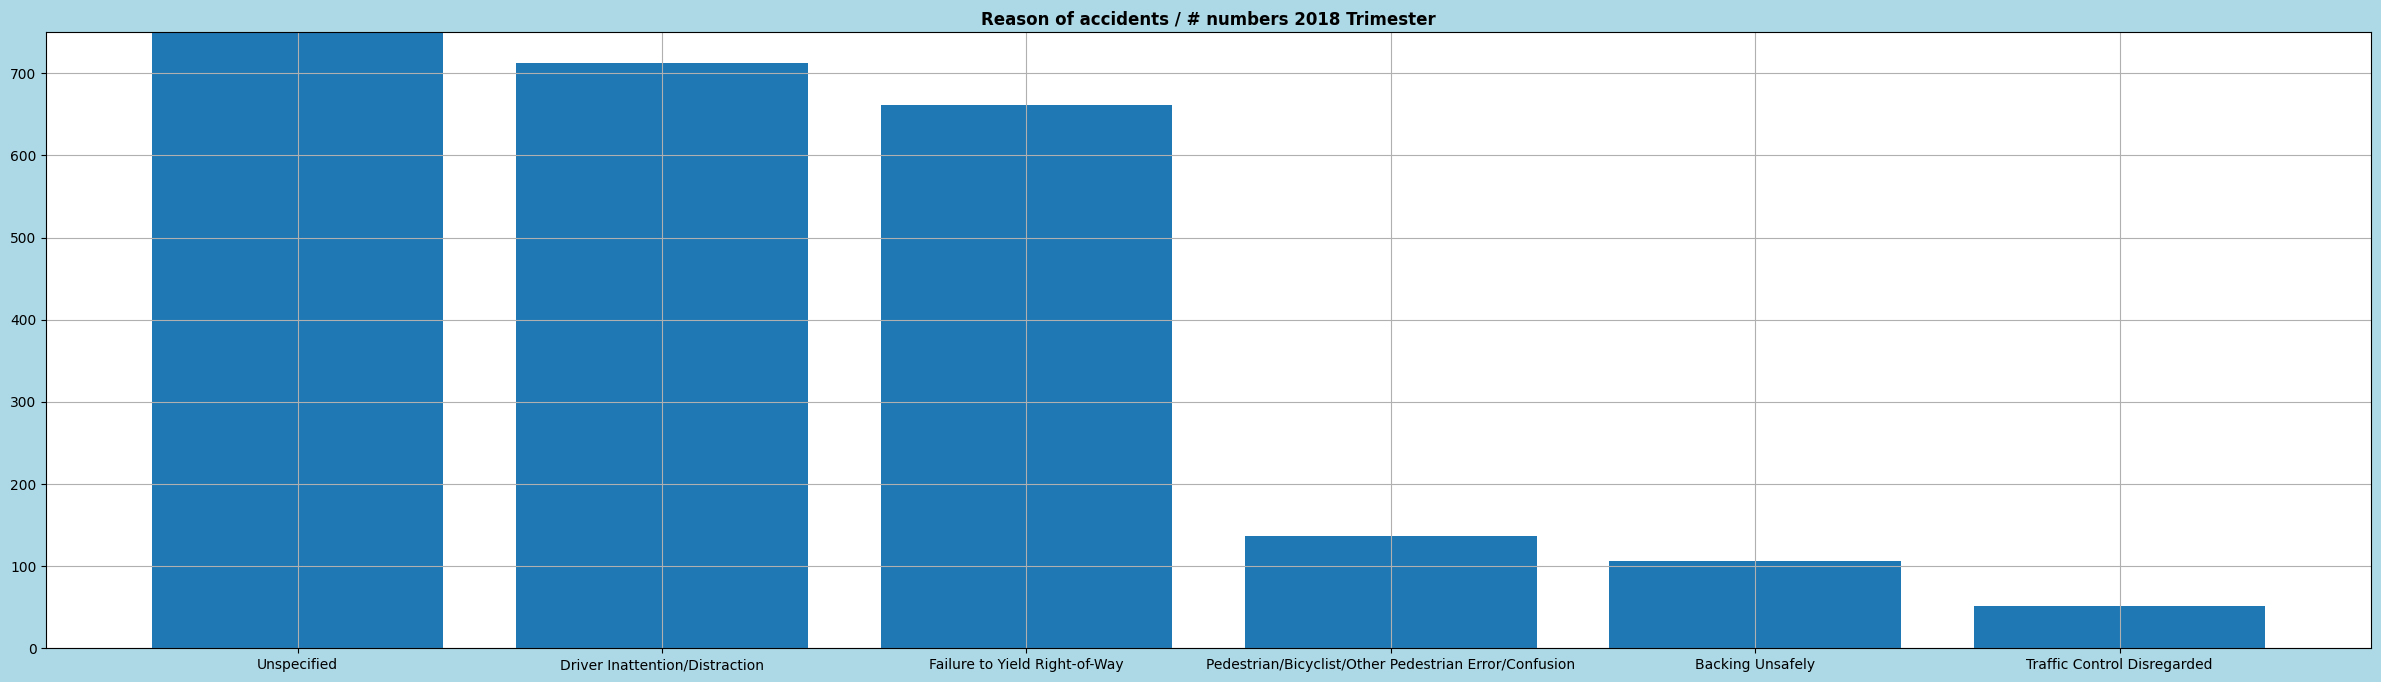

<Figure size 640x480 with 0 Axes>

In [12]:
# Primero, se convierte date en años, creando la variable de años.
df1["year"]=df1["DATE"].dt.year
# Segundo, se crea un bucle for para crea un diccionario el cual contiene el años, y la documentación en una sola lista.
diccionario={year: df for year, df in df1.groupby("year")}
# Tercera, filtramos por solo 2019
diccionario=diccionario[2019]
# Cuarto, se crea la variable trimestre, si el año es igual a 2019 y es menor o igal a 3 meses, pongalo en trimestre.
trimestre= df1[(df1["year"]==2019)&(df1["DATE"].dt.month<=3)]
# Quinto, agrupamos todos los accidentes mayores a 0 por cada columna.
Filtro1 = (trimestre["NUMBER OF PEDESTRIANS INJURED"] > 0)| (trimestre["NUMBER OF PEDESTRIANS KILLED"] > 0)| \
          (trimestre["NUMBER OF CYCLIST INJURED"] > 0)| (trimestre["NUMBER OF CYCLIST KILLED"] > 0)
# Sexto, se crea una variable que utilice Filtro 1, y lo filtre por el trimestre.
accidentes_peatones_ciclistas = trimestre[Filtro1]
factors1 = pd.concat([accidentes_peatones_ciclistas["CONTRIBUTING FACTOR VEHICLE 1"],
                      accidentes_peatones_ciclistas["CONTRIBUTING FACTOR VEHICLE 2"],
                      accidentes_peatones_ciclistas["CONTRIBUTING FACTOR VEHICLE 3"],
                      accidentes_peatones_ciclistas["CONTRIBUTING FACTOR VEHICLE 4"],
                      accidentes_peatones_ciclistas["CONTRIBUTING FACTOR VEHICLE 5"],]).dropna().reset_index(drop=True)
# Octavo, se resetea el indez y se utiliza value counts().
common =factors1.value_counts().reset_index()
# Noveno, se crean los títulos de las columnas.
common.columns=["Accident","Number"]

common5 = common.head(6)


# Decimo, se imprime la respuesta a la pregunta.
print(" Comparando el primer semestre del 2019 con el de 2018, se descubre que la distracción del conductor,\n la inatención de los peatones, y la obstrucción visual son las razones principales porque el 2019 tuvo más accidentes en estos ambitos.\n\
Sabiendo estos factores que aumentaron se debe trabajar en conjunto para concientizar tanto a peatones como a counductores\n de los peligros que se generan al no prestar atención cuando se está al volante y cuando se cruza la calle\n\n")
print(common5)




# Finalmente se imprime el resultado.
plt.figure(figsize=(30,8), facecolor="lightblue")
plt.grid()
plt.title("Reason of accidents / # numbers 2019 Trimester", fontweight= "bold")
plt.ylim(0,750)
plt.bar(common5["Accident"],common5["Number"])
plt.show()
plt.tight_layout()

#----------------------SE REPITE EL PROCESO PARA COMPARARLO CON EL TRIMESTRE DEL 2018-------------------------------------------------
#----------------------SE REPITE EL PROCESO PARA COMPARARLO CON EL TRIMESTRE DEL 2018-------------------------------------------------
#----------------------SE REPITE EL PROCESO PARA COMPARARLO CON EL TRIMESTRE DEL 2018-------------------------------------------------
#----------------------SE REPITE EL PROCESO PARA COMPARARLO CON EL TRIMESTRE DEL 2018-------------------------------------------------

df1["year"]=df1["DATE"].dt.year

diccionario={year: df for year, df in df1.groupby("year")}

diccionario=diccionario[2019]

trimestre1= df1[(df1["year"]==2018)&(df1["DATE"].dt.month<=3)]

Filtro2 = (trimestre1["NUMBER OF PEDESTRIANS INJURED"] > 0)| (trimestre1["NUMBER OF PEDESTRIANS KILLED"] > 0)| \
          (trimestre1["NUMBER OF CYCLIST INJURED"] > 0)| (trimestre1["NUMBER OF CYCLIST KILLED"] > 0)

accidentes_peatones_ciclistas1 = trimestre1[Filtro2]
factors10 = pd.concat([accidentes_peatones_ciclistas1["CONTRIBUTING FACTOR VEHICLE 1"],
                      accidentes_peatones_ciclistas1["CONTRIBUTING FACTOR VEHICLE 2"],
                      accidentes_peatones_ciclistas1["CONTRIBUTING FACTOR VEHICLE 3"],
                      accidentes_peatones_ciclistas1["CONTRIBUTING FACTOR VEHICLE 4"],
                      accidentes_peatones_ciclistas1["CONTRIBUTING FACTOR VEHICLE 5"],]).dropna().reset_index(drop=True)

common =factors10.value_counts().reset_index()
common.columns=["accident","number"]

common6 = common.head(6)




print(common6)





plt.figure(figsize=(30,8), facecolor="lightblue")
plt.grid()
plt.title("Reason of accidents / # numbers 2018 Trimester", fontweight= "bold")
plt.ylim(0,750)
plt.bar(common6["accident"],common6["number"])
plt.show()
plt.tight_layout()



### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

                            Vehicle type  Total Deaths
395                                Sedan           115
405  Station Wagon/Sport Utility Vehicle           112
318                    PASSENGER VEHICLE            54
381        SPORT UTILITY / STATION WAGON            34
436                                 Taxi            17


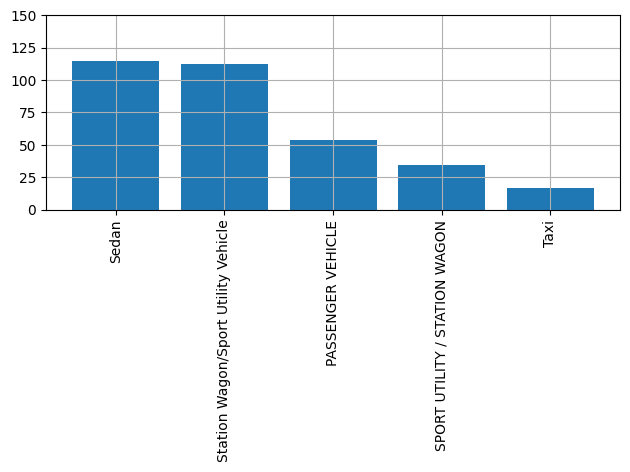

In [ ]:
# Se concatenan todos los tipos de vehículos en la variable factors1, se quitan los nas y se resetea el index para organizar.
factors1 = pd.concat([df1["VEHICLE TYPE CODE 1"],
                  df1["VEHICLE TYPE CODE 2"],
                  df1["VEHICLE TYPE CODE 3"],
                  df1["VEHICLE TYPE CODE 4"],
                  df1["VEHICLE TYPE CODE 5"]]).dropna().reset_index(drop=True)

# Segundo, se filtra dicha variable para que muestre los resultados excepto "Unknown", y se vuelve a resetear el indez.
factors1= factors1[factors1 != "Unknown"].reset_index(drop=True)
# Tercero, se crea un data frame que concatene el tipo de vehículo, con el accidente propiciado.
factors2 = pd.DataFrame({"Vehicle type": factors1,
                        "Total Deaths": df1["NUMBER OF PEDESTRIANS KILLED"].repeat(5).reset_index(drop=True) + 
                                        df1["NUMBER OF CYCLIST KILLED"].repeat(5).reset_index(drop=True) + 
                                        df1["NUMBER OF MOTORIST KILLED"].repeat(5).reset_index(drop=True)})

# Cuartos se agrupa por las variables del data frame, se suma y se resetea el indice, se organizan de manera descendente y se muestran los primero 5 valores.
new2 = factors2.groupby("Vehicle type")["Total Deaths"].sum().reset_index()
new2 = new2.sort_values(by="Total Deaths", ascending=False)
aftermath = new2.head(5)
# Quinto, se imprime en letras el resultado.
print(aftermath)
# Sexto, se imprimen los gráficos.
plt.bar(aftermath["Vehicle type"],aftermath["Total Deaths"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0,150)
plt.grid()
